In [1]:
# import information
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from config import un, pw, host, port 


In [2]:
# connect to local database
engine = create_engine(f"postgresql://{un}:{pw}@{host}:{port}/Employee_db")
conn = engine.connect()

In [3]:
# import the employees table"
employees = pd.read_sql('select * from employees', conn)
employees.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [4]:
# import the titles table"
titles = pd.read_sql('select * from titles', conn)
titles.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [5]:
# import the salaries table"
salaries = pd.read_sql('select * from salaries', conn)
salaries.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [6]:
# merge for employee titles
emp_titles = employees.merge(titles, how="left", left_on='emp_title_id', right_on='title_id')
emp_titles.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,title_id,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,s0001,Staff
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,e0002,Engineer
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,e0002,Engineer
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,s0001,Staff
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,e0003,Senior Engineer


In [7]:
# merge for employee salaries
emp_salaries = emp_titles.merge(salaries, how="left", on='emp_no')
emp_salaries.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,title_id,title,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,s0001,Staff,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,e0002,Engineer,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,e0002,Engineer,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,s0001,Staff,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,e0003,Senior Engineer,40000


In [8]:
emp_title_sal = emp_salaries[['emp_no', 'title', 'salary']]
emp_title_sal.head()

,emp_no,title,salary
0,473302,Staff,40000
1,475053,Engineer,53422
2,57444,Engineer,48973
3,421786,Staff,40000
4,282238,Senior Engineer,40000


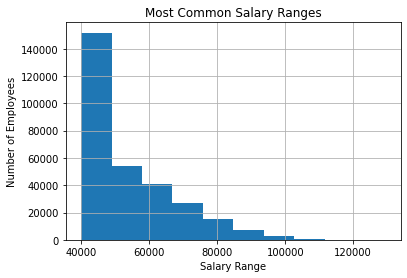

<Figure size 432x288 with 0 Axes>

In [9]:
# Histogram to visualize the most common salary ranges for employees

#plot the data
emp_title_sal.hist(column='salary')

#Format the plotted data
plt.xlabel("Salary Range")
plt.ylabel("Number of Employees")
plt.title("Most Common Salary Ranges")
plt.grid(True)

#display data
plt.show()
plt.savefig("Most Common Salary Ranges.png")

In [11]:
# Get average salary by title
avg_sal_by_title = round(emp_title_sal.groupby(['title'])['salary'].mean(),2)
avg_sal_by_title


title
Assistant Engineer    48564.43
Engineer              48535.34
Manager               51531.04
Senior Engineer       48506.80
Senior Staff          58550.17
Staff                 58465.38
Technique Leader      48582.90
Name: salary, dtype: float64